# Klasifikace na základě vzdálenosti

Úloha zaměřená na implementaci vybraných klasifikačních algoritmů na základě vzdálenosti.


## K-NN (Metoda nejbližšího souseda)
K-NN je neparametrickou vzdálenostní metodou.

**Učení:**
* uložení všech $N$ trénovacích dat
* známe hodnoty dat a příslušnost každého vzorku k nějaké třídě

**Klasifikace do celkem $K$ tříd $c_0...c_k$ :**

* Pro klasifikovaný příznakový vektor $x$ je nalezen vzorek $(𝒙_𝑖, 𝑐_𝑖)$, který je mu nejblíže a na základě jeho příslušnosti k jedné ze tříd je rozhodnuto o klasifikaci:
$$ x \in c_k \leftrightarrow dist(x, x_i) < dist(x, x_j) $$  
kde $x_i \in c_k$

![image info](data/knn_image.png)


Zdroj: https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn   

### Reprezentace tříd etalony (centroidy)
Etalon je představitelem třídy, který ji nejlépe reprezentuje ve smyslu vzdálenosti ke všem prvkům trénovací množiny.
Etalon je buď skutečným prvkem třídy, nebo může vzniknout výpočtem.
Pro **každou třídu** je etalon stanoven v průběhu učení systému.
    
#### Vzdálenostní klasifikace pomocí etalonů:
**Učení:**
* Pro každou třídu se určí její etalon (centroid)
* Je určen jako průměrný prvek

**Klasifikace do celkem $K$ tříd $c_0...c_k$ :**

* Pro klasifikovaný příznakový vektor $x$ je nalezen centroid $(𝒙_𝑖, 𝑐_𝑖)$, který je mu nejblíže, a na základě jeho příslušnosti k jedné ze tříd je rozhodnuto o klasifikaci:
$$ x \in c_k \leftrightarrow dist(x, x_i) < dist(x, x_j) $$  
kde $x_i \in c_k$
 
### Vzdálenostní funkce
#### Hammiltonová vzálenost (L1) 
$$ d(x,z) = \sum_{i=0}^{Dim}{|x_i - z_i|} $$

#### Euklidovská vzdálenost (L2)
$$ d(x,z) = \sqrt{\sum_{i=0}^{Dim}{(x_i - z_i)^2}} $$

Při implementaci jde vynechat operaci druhé odmocniny, protože druhá odmocnina je monotónní rostoucí funkce. To znamená, že se mění jenom absolutní hodnoty vzdálenosti, ale pořadí se zachovává:
$$ d(x,z) = \sum_{i=0}^{Dim}{(x_i - z_i)^2} $$


### Výpočet úspěšnosti
$$ accuracy = \frac{\text{počet správně klasifikovaných objektů}}{\text{počet všech klasifikovaných objektů}} $$


### Vektor příznaků
Klasifikovaný objekt lze reprezentovat jako vektor příznaků s rozměrem D.
Hodnoty vektoru budou odpovídat hodnotám jasu jednotlivých pixelů, kde $a$ je šířka obrázku a $b$ výška v pixelech.
Prostor příznaků – 2D příklad:
Objekty patřící do jednotlivých tříd mají podobné hodnoty příznaků.
Vytváří v prostoru příznaků shluky (jsou blízko sebe)


## Dvě třídy

In [1]:
import numpy as np
import usu


In [28]:
npzfile = np.load('data/data_04.npz')
npzfile.files


['testData', 'testRef', 'trainData', 'trainRef']

In [29]:
testData = npzfile['testData'] # body, 1 radek je 1 bod se souradnici[x,y]
testRef = npzfile['testRef']# tridy 0 a 1

trainData = npzfile['trainData']
trainRef = npzfile['trainRef']


In [30]:
trainData.shape, trainRef.shape, testData.shape, testRef.shape


((1900, 2), (1900, 1), (100, 2), (100, 1))

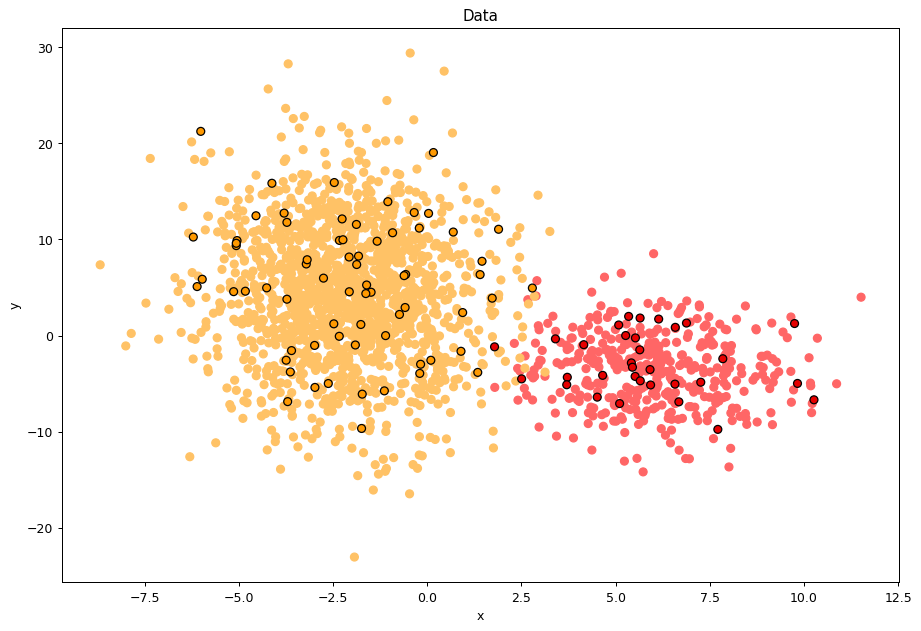

In [31]:
usu.draw2d(trainData, trainRef, testData, testRef )


In [69]:
class KNN:
    
   
    def __init__ (self, k=1, distance='l1'):
        """
        k - pocet sousedu
        distance: l1(hammiltonova) nebo l2(euklidovska)
        """
        self.k = k
        self.distance = distance
        
        self.train_data = None
        self.train_targets = None
    
    # moznost normalizace dat z-skore
    # mahalanobisova vzdalenost? - normalizace pomoci rozptylu
    def train(self, train_data, train_targets, etalons=False) -> None:
        """
            
        """
        #################################################################
        # ZDE DOPLNIT
        
        if(etalons):          
            
            #do proměnné self.train_data uložte etalony a nastavte jim odpovídající třídu do self.train_targets

            self.train_data = [] # matice priznaku
            self.train_targets = [] # vector of classes for each etalon

            data_count = []

            # preallocate lists
            for i in range(0, len(np.unique(train_targets))):
                self.train_data.append([0,0])
                self.train_targets.append(i)
                data_count.append(0)

            # sum all data for each class
            for i, data in enumerate(train_data):
                class_index = int(train_targets[i])
                for j in range(0, len(data)): # kdybychom meli viceroznorozmerne data nez jen 2
                    self.train_data[class_index][j] += data[j]
                data_count[class_index] += 1

            # divide by count to get average
            for i, data in enumerate(self.train_data):
                for j in range(0, len(data)): # kdybychom meli viceroznorozmerne data nez jen 2
                    self.train_data[i][j] /= data_count[i]

            # convert to numpy array
            self.train_data = np.array(self.train_data)
            self.train_targets = np.array(self.train_targets)

            #print("Etalony:")
            #for e in self.train_data:
            #    print(e)

            return

        # not using etalons:
        # copy data to class variables
        self.train_data = train_data # matice priznaku

        self.train_targets = train_targets # vektor trid
        #for i in range(0, len(self.train_targets)):
            #print(self.train_targets[i])

            
        #################################################################


    @staticmethod
    def get_hamilton_distance(data, neighbour):
        distance = 0
        for i in range(0, len(data)):
            distance += abs(data[i] - neighbour[i])
        return distance


    @staticmethod
    def get_euclidean_distance(data, neighbour):
        distance = 0
        for i in range(0, len(data)):
            distance += (data[i] - neighbour[i])**2
        return distance

    def classification(self, test_data, test_targets) -> float:

        #################################################################
        # ZDE DOPLNIT

        nearest_neighbour_distances = []
        nearest_neighbour_classes = []

        #for i in range(0, len(self.train_targets)):
        #    print(self.train_targets[i])


        # allocate lists to be of the same size as test_data
        for _ in range(0, len(test_data)):
            nearest_neighbour_distances.append(2147483647)
            nearest_neighbour_classes.append(0)

        nearest_neighbour_classes = np.array(nearest_neighbour_classes)

        # classify
        for i, tst_data in enumerate(test_data):
             for neighbour in self.train_data:
                if self.distance == 'l1':
                    distance = self.get_hamilton_distance(tst_data, neighbour)
                else:
                    distance = self.get_euclidean_distance(tst_data, neighbour)
                #print(distance)
                if distance < nearest_neighbour_distances[i]:
                    nearest_neighbour_distances[i] = distance
                    nearest_neighbour_classes[i] = self.train_targets[i]
                    #print(self.train_targets[i])
        #print(nearest_neighbour_classes)
        # compute the accuracy of the model
        accuracy = 0
        for i, tst in enumerate(test_data):
            #print(int(nearest_neighbour_classes[i]), int(test_targets[i]))
            if int(nearest_neighbour_classes[i]) == int(test_targets[i]):
                accuracy += 1

        accuracy /= len(test_data)

        # klasifikace bez etalonu, najdu prvek z trenovacich dat, ktery je uplne nejblize k prvku, ktery chceme klasifikovat

        return accuracy
        #################################################################

In [39]:
KNN.train(KNN(1), trainData, trainRef, etalons=False)

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


### Implementace bez použití etalonů

In [70]:
print("metrika l1:")
for k in range(1,10): 
    knn = KNN(k, 'l1') 
    knn.train(trainData, trainRef)
    acc = knn.classification(testData, testRef)
    print(f" k = {k}, accuracy: {acc:.2f} %")


metrika l1:
 k = 1, accuracy: 0.32 %
 k = 2, accuracy: 0.32 %
 k = 3, accuracy: 0.32 %
 k = 4, accuracy: 0.32 %
 k = 5, accuracy: 0.32 %
 k = 6, accuracy: 0.32 %
 k = 7, accuracy: 0.32 %
 k = 8, accuracy: 0.32 %
 k = 9, accuracy: 0.32 %


In [10]:
print("\nmetrika l2:")
for k in range(1,10): 
    knn = KNN(k, 'l2') 
    knn.train(trainData, trainRef)
    acc = knn.classification(testData,testRef)
    print(f" k = {k}, accuracy: {acc:.2f} %")



metrika l2:
 k = 1, accuracy: 0.32 %
 k = 2, accuracy: 0.32 %
 k = 3, accuracy: 0.32 %
 k = 4, accuracy: 0.32 %
 k = 5, accuracy: 0.32 %
 k = 6, accuracy: 0.32 %
 k = 7, accuracy: 0.32 %
 k = 8, accuracy: 0.32 %
 k = 9, accuracy: 0.32 %


### Reprezentace tříd etalony (centroidy)

In [11]:
k=1
knn = KNN(k, 'l1') 
knn.train(trainData,trainRef, True)
print(knn.train_data.shape, trainData.shape, type(knn.train_data), type(trainData)) #zkontrolujeme jestli velikosti a typ jsou stejny

acc = knn.classification(testData,testRef)
print(f"acc with l1, k = {k} is {acc:.2f} %")

knn = KNN(k, 'l2') 
knn.train(trainData,trainRef, True)
acc = knn.classification(testData,testRef)
print(f"acc with l2, k = {k} is {acc:.2f} %")

(2, 2) (1900, 2) <class 'numpy.ndarray'> <class 'numpy.ndarray'>
acc with l1, k = 1 is 0.32 %
acc with l2, k = 1 is 0.32 %


## Tři třídy

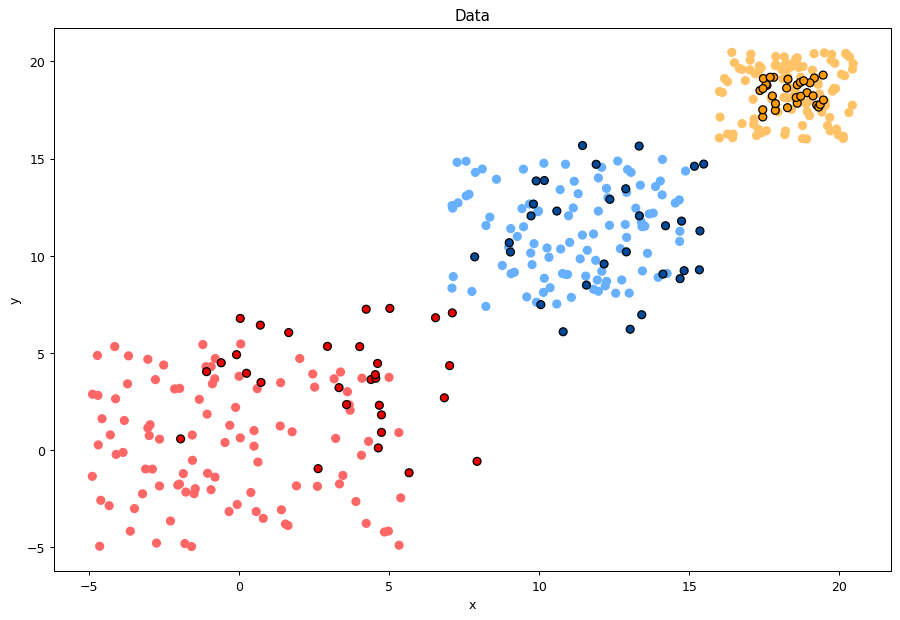

In [13]:
npzfile = np.load('data/data_04_3cl.npz')

testData = npzfile['testData']
testRef = npzfile['testRef']
trainData = npzfile['trainData']
trainRef = npzfile['trainRef']

usu.draw2d(trainData, trainRef, testData, testRef)


### Implementace bez použití etalonů

In [14]:
trainData.shape, trainRef.shape, testData.shape, testRef.shape

((300, 2), (300, 1), (90, 2), (90, 1))

In [15]:
print("metrika l1:")
for k in range(1,5): 
    knn = KNN(k, 'l1') 
    knn.train(trainData, trainRef)
    acc = knn.classification(testData, testRef)
    print(f" k = {k}, accuracy: {acc:.2f} %")


metrika l1:
 k = 1, accuracy: 96.67 %
 k = 2, accuracy: 96.67 %
 k = 3, accuracy: 96.67 %
 k = 4, accuracy: 96.67 %


In [16]:
print("\nmetrika l2:")
for k in range(1,5): 
    knn = KNN(k, 'l2') 
    knn.train(trainData, trainRef)
    acc = knn.classification(testData,testRef)
    print(f" k = {k}, accuracy: {acc:.2f} %")



metrika l2:
 k = 1, accuracy: 95.56 %
 k = 2, accuracy: 96.67 %
 k = 3, accuracy: 95.56 %
 k = 4, accuracy: 96.67 %


### Reprezentace tříd etalony (centroidy)

In [48]:
k=1
knn = KNN(k, 'l1') 
knn.train(trainData,trainRef, True)

acc = knn.classification(testData,testRef)
print(f"acc with l1, k = {k} is {acc:.2f} %")

knn = KNN(k, 'l2') 
knn.train(trainData,trainRef, True)
acc = knn.classification(testData,testRef)
print(f"acc with l2, k = {k} is {acc:.2f} %")


IndexError: index 1 is out of bounds for axis 0 with size 1

### Závěr:
 1. Rozhodněte, kdy je vhodnější použít který algoritmus.
 2. Určete složitost algoritmů.

In [ ]:
# 1. ...
# 2. ...